In [34]:
import matplotlib.pyplot as plt
import math

#wir kriegen die daten als p(phi) mit phi als Winkel der Kurbelwelle
#und zwar als tabelle.

#der worflow wird sein, 
#daten einlesen
#phis in Volumen umrechnen
#p/V diagram zeichnen,
#fläche integrieren
#??? Arbeit in Pme umrechnen
#Pme / Umin**-1 diagramm zeichnen

#aus [...]_b_[...].xlsx , weil da die 1500 u/min waren.
Drehmomente=[31.3,
             61.1,
             94.1,
             124.3,
             155.6,
             188.2,
             219.6,
             251.1,
             282.0,
             308.2,
            ]
#wir brauchen die Tabellen für

#V ist gegeben als
#V=A_Querschnitt*(Hub(phi)+Resthöhe)

A=1 #querschnittsfläche
Bohrung=0.081#m
A=math.pi*(Bohrung/2)**2 # m
print("querfläche",A)
Hubmax=0.0955#m
Komph=0.0458#m

Vmax=A*Hubmax 
Pmes=[]
for d in Drehmomente:
    v=d/Vmax #in Pascal
    v=v*10**-5 # in bar
    Pmes.append(v)


querfläche 0.005152997350050658


In [40]:
def convert_phi_to_rad(phi):
    
    rad=(phi/360)*math.pi*2
    return rad

def get_phis_ps(fn="2014_02_12_b_kalibriert.csv"):

    phis=[]
    ps=[]
    with open(fn,"r") as f:
        f.readline()
        f.readline()#burn the two first, they're just stuff
        for line in f.readlines():
            line=line[:-2]#remove newline
            line=line.split(",")
            phis.append(convert_phi_to_rad(float(line[0])))#oder den wert oder wie auch immer
            ps.append(float(line[1])) #ps in bar
    return phis,ps

phis,ps=get_phis_ps()

-6.283185307179586 -4.537856055185257 -1.0471975511965976 5.93411945678072
0.005152997350050658 0.0962993202148276 0.0004962301418786864


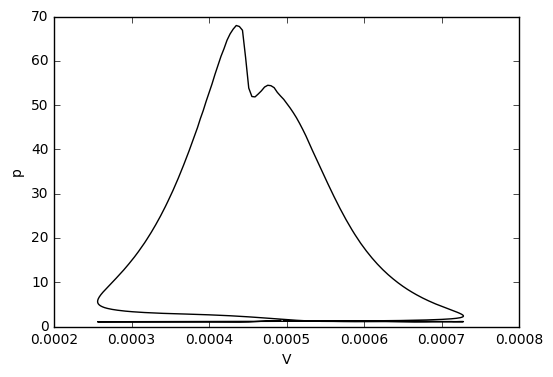

In [42]:



def Hub(phi):
    #some function
    #fürs erste sollte der Sinus reichen   
    
    h=(Hubmax-Komph*math.sin(phi))
    #print(h)
    return h


print(phis[0],phis[100],phis[300],phis[700])

Vs=[]
for phi in phis:
    V=A*Hub(phi)
    
    Vs.append(V)
print(A,Hub(phi),V)

    
#print(Vs[0:100])
#Aufpassen, ich brauche entweder nur einen Ladungswechsel, oder ich muss mitteln
#unabhängig davon, habe ich
#jetzt alle Werte für p und V
#und man kann das p V diagram plotten

#dummy werte
#Vs=[4,2,2,4,1,3,4]
#ps=[2,2,1,1,8,8,2]

plt.plot(Vs,ps,color="black")
plt.xlabel("V")
plt.ylabel("p")
plt.show()
plt.clf()



In [43]:

#numerische Flächeberechnung nach Cha Zhang
#EFFICIENT FEATURE EXTRACTION FOR 2D/3D OBJECTS
#IN MESH REPRESENTATION
def Teilfläche(p1,p2):
    A = 1/2 * ( - p2[0] * p1[1] + p1[0] * p2[1] )
    return A


A=0
c=0
m=len(Vs)
while c < m-1:
    p1=(ps[c],Vs[c])
    p2=(ps[c+1],Vs[c+1])
    Teil_A=Teilfläche(p1,p2)
    #control printout
    #print("parts",p1,p2,Teil_A)
    A+=Teil_A
    c+=1
    
print("Ergebnis, Arbeit bzw. eingeschlossene Fläche:",A)

#Wir haben jetzt also die Arbeit, in Nm, für einen Lastwechsel,



Ergebnis, Arbeit bzw. eingeschlossene Fläche: -0.012777989876943613


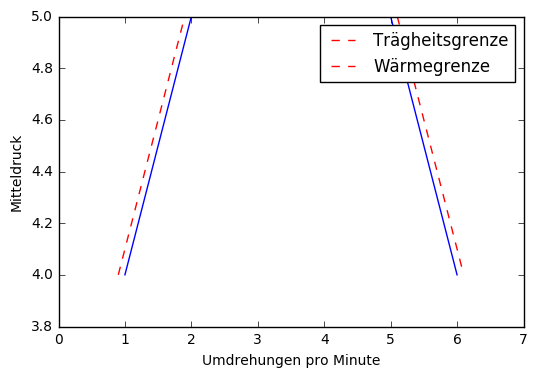

In [21]:
#Als nächsten Schritt, zur Berechnung des Motorkennfelds
#brauchen wir den Mitteldruck...

#ähm...

#Flächen und Volumina?
#As=[1,2,2,2,1]


#dummy werte
Pme=[4,5,5,5,4]

#Wir haben wahrscheinlich auch Daten zur Umdrehungsgeschwindigkeit,

Us=[1,2,4,5,6]

plt.plot(Us,Pme)
plt.xlabel("Umdrehungen pro Minute")
plt.ylabel("Mitteldruck")



#Trägheitsgrenze
Tx=[0.9,1.9]
Ty=[4,5]
plt.plot(Tx,Ty,color="red",linestyle="--",label="Trägheitsgrenze")

#Wärmegrenze
Wx=[5.1,6.1]
Wy=[5,4]
plt.plot(Wx,Wy,color="red",linestyle="--",label="Wärmegrenze")


plt.legend()

plt.show()
plt.clf()
